#### Hotel Booking Analysis.

#importing important libraries

In [28]:
import pandas as pd

### Data loading and Cleaning

In [29]:
df = pd.read_csv('C:/Users/HIMANSHU/Desktop/Data Analyst Bootcamp/Assignments/PROJECT PORTFOLIO/Hotel Bookings/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [30]:
df.drop(['agent','company'], axis = 1,inplace = True)

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,3/7/2015


#### Booking Trends Analysis:

### Q1. What is the overall cancellation rate?

In [32]:
cancellation_rate = df['is_canceled'].mean()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")

Overall cancellation rate: 37.04%


### Q2.How do cancellations vary between Resort and City hotels?

In [33]:
cancellation_rates = (df.groupby('hotel')['is_canceled'].mean()*100).round(2)
print(cancellation_rates)

hotel
City Hotel      41.73
Resort Hotel    27.76
Name: is_canceled, dtype: float64


### Q3. Are there any patterns in cancellation rates based on the month or week number of arrival?

In [34]:
cancellation_pattern = df.groupby(['arrival_date_month', 'arrival_date_week_number'])['is_canceled'].mean() * 100
print(cancellation_pattern)

arrival_date_month  arrival_date_week_number
April               13                          34.848485
                    14                          40.967962
                    15                          38.936408
                    16                          40.582121
                    17                          42.210339
                                                  ...    
September           36                          39.852941
                    37                          39.300135
                    38                          39.045472
                    39                          38.240992
                    40                          40.071556
Name: is_canceled, Length: 70, dtype: float64


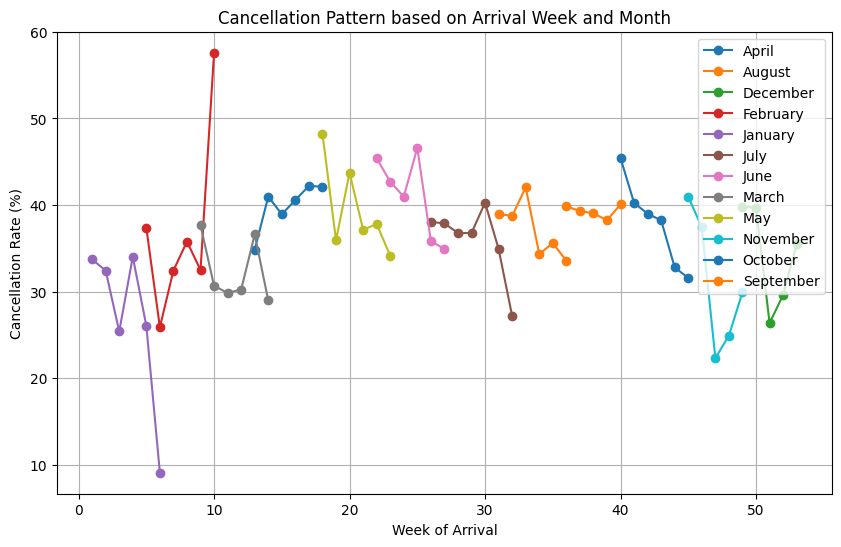

In [35]:
import matplotlib.pyplot as plt
cancellation_pattern = cancellation_pattern.reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
for month in cancellation_pattern['arrival_date_month'].unique():
    monthly_data = cancellation_pattern[cancellation_pattern['arrival_date_month'] == month]
    plt.plot(
        monthly_data['arrival_date_week_number'],
        monthly_data['is_canceled'],
        marker='o',
        label=month
    )

plt.xlabel('Week of Arrival')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Pattern based on Arrival Week and Month')
plt.legend()
plt.grid(True)

plt.show()

#### Guest Behavior Analysis:

#### Q. What's the average lead time for bookings?

In [36]:
Average_lead_time = (df['lead_time'].mean()).round(0)
print(Average_lead_time)

104.0


### Q. Do repeated guests tend to cancel less?

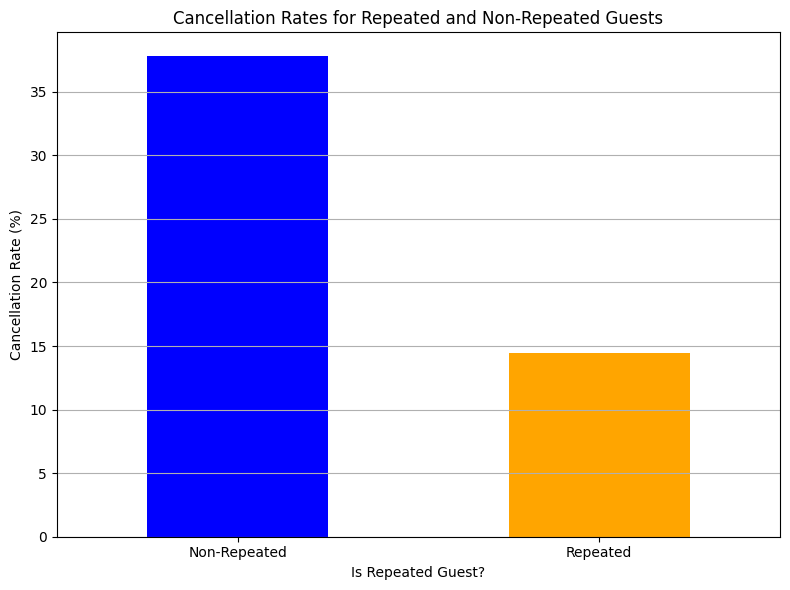

In [37]:
cancellation_rates = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
cancellation_rates.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Is Repeated Guest?')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rates for Repeated and Non-Repeated Guests')
plt.xticks(ticks=[0, 1], labels=['Non-Repeated', 'Repeated'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Q. Are there differences in booking patterns (weekend vs. weeknights) based on hotel type?

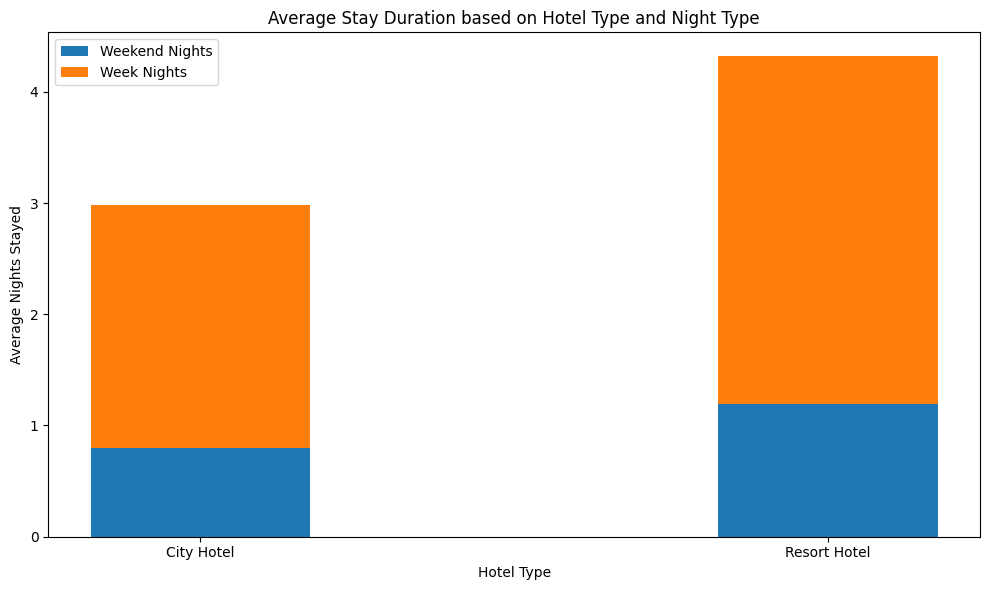

In [39]:

# Calculate average stays for weekend nights and weeknights based on hotel type
avg_stays = df.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean()

# Plotting the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = avg_stays.index
labels = avg_stays.columns

weekend_nights = avg_stays['stays_in_weekend_nights']
week_nights = avg_stays['stays_in_week_nights']

bar1 = ax.bar(index, weekend_nights, bar_width, label='Weekend Nights')
bar2 = ax.bar(index, week_nights, bar_width, bottom=weekend_nights, label='Week Nights')

ax.set_xlabel('Hotel Type')
ax.set_ylabel('Average Nights Stayed')
ax.set_title('Average Stay Duration based on Hotel Type and Night Type')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.tight_layout()
plt.show()

#### Room and Reservation Analysis:

#### Q. How often are room types reserved but not assigned upon arrival?

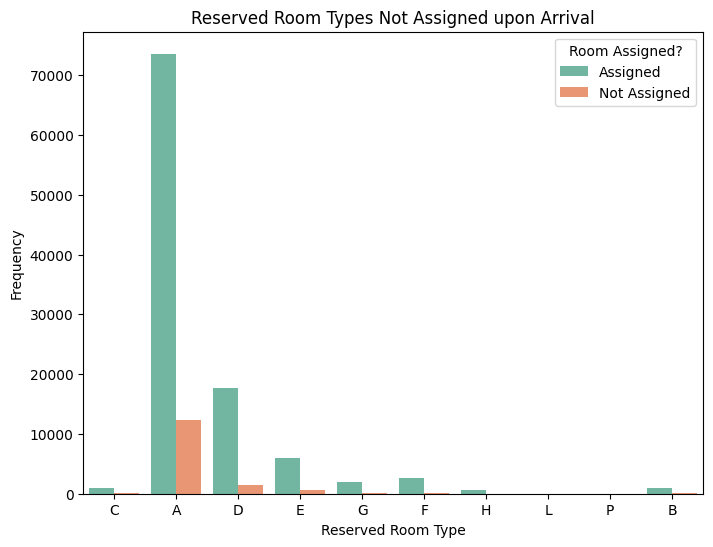

Percentage of reserved room types not assigned: 12.49%


In [40]:
import seaborn as sns
# Check where reserved room types are not assigned upon arrival
df['not_assigned'] = df['reserved_room_type'] != df['assigned_room_type']

# Count the occurrences of reserved room types not being assigned
not_assigned_count = df['not_assigned'].sum()

# Calculate the percentage of cases where room types are reserved but not assigned
total_entries = len(df)
percentage_not_assigned = (not_assigned_count / total_entries) * 100

# Create a count plot to visualize reserved room types not assigned upon arrival
plt.figure(figsize=(8, 6))
sns.countplot(x='reserved_room_type', hue='not_assigned', data=df, palette='Set2')
plt.xlabel('Reserved Room Type')
plt.ylabel('Frequency')
plt.title('Reserved Room Types Not Assigned upon Arrival')
plt.legend(['Assigned', 'Not Assigned'], title='Room Assigned?')
plt.show()

print(f"Percentage of reserved room types not assigned: {percentage_not_assigned:.2f}%")


### Q. Are there particular room types more commonly booked by different customer types or countries?

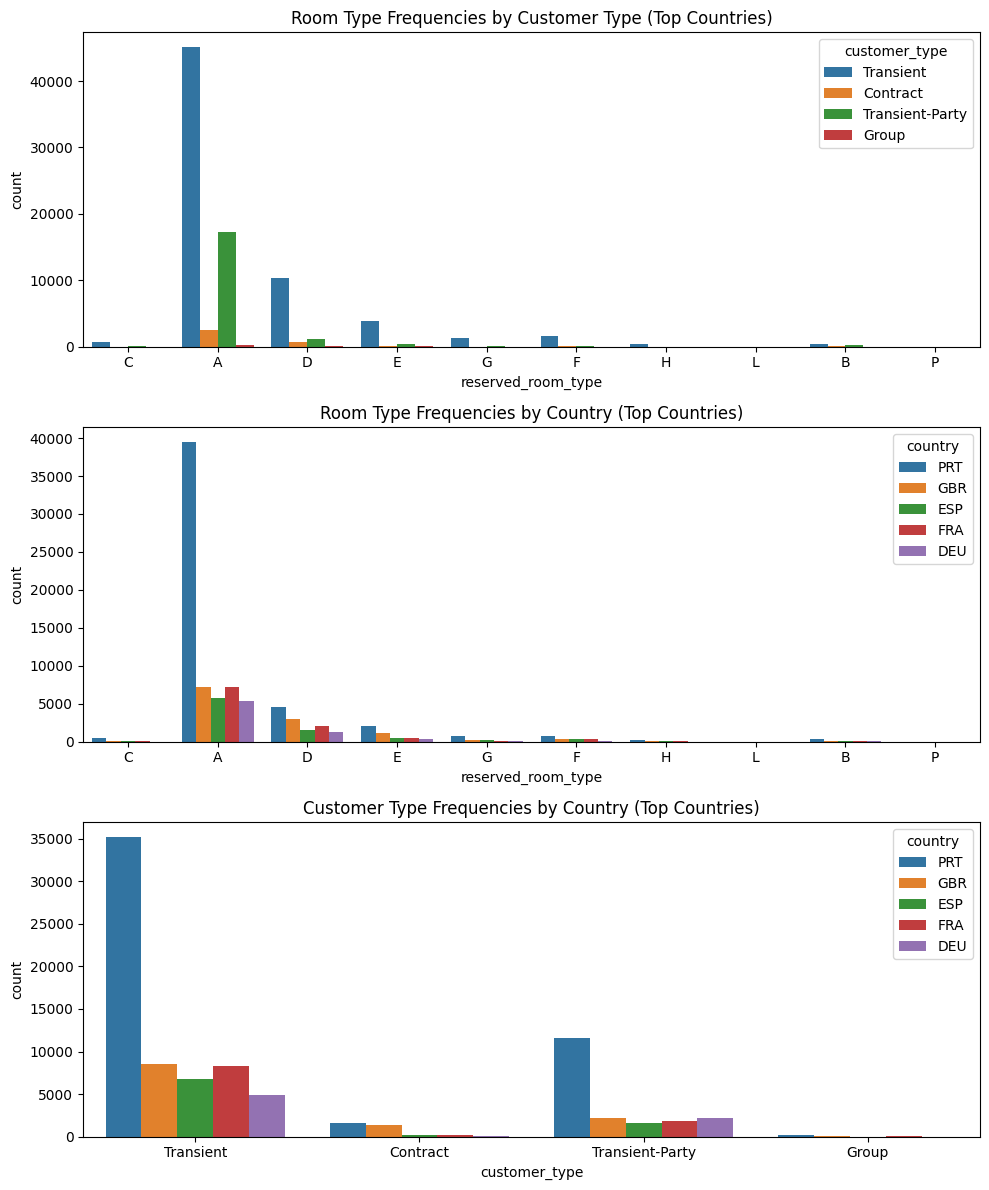

In [46]:
# Get the top N countries with the most bookings
top_countries = df['country'].value_counts().nlargest(5).index.tolist()  # Change 3 to the desired number of countries

# Filter the DataFrame for the top countries
df_top_countries = df[df['country'].isin(top_countries)]

# Create count plots for each category based on the top countries
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.countplot(x='reserved_room_type', hue='customer_type', data=df_top_countries, ax=axes[0])
axes[0].set_title('Room Type Frequencies by Customer Type (Top Countries)')

sns.countplot(x='reserved_room_type', hue='country', data=df_top_countries, ax=axes[1])
axes[1].set_title('Room Type Frequencies by Country (Top Countries)')

sns.countplot(x='customer_type', hue='country', data=df_top_countries, ax=axes[2])
axes[2].set_title('Customer Type Frequencies by Country (Top Countries)')

plt.tight_layout()
plt.show()

#### Financial Insights:

##### Q What's the average daily rate (ADR) for different hotel types?

In [48]:
average_Adr_by_type = (df.groupby('hotel')['adr'].mean()).round(2)
print(average_Adr_by_type)

hotel
City Hotel      105.30
Resort Hotel     94.95
Name: adr, dtype: float64


### Q. Are there seasonal trends in ADR or revenue generation?

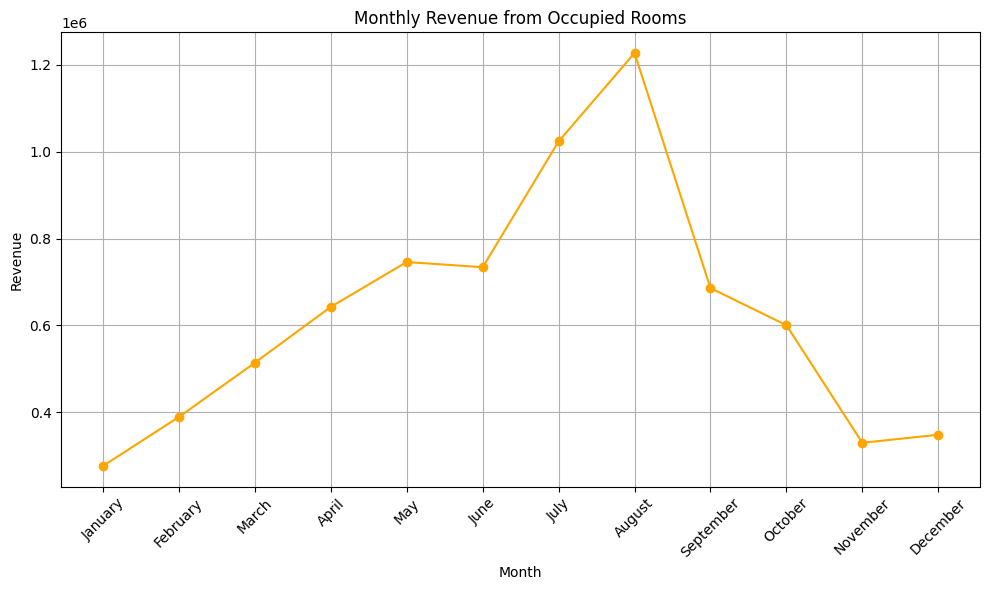

In [54]:
# Sort months chronologically (if needed)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
df = df.sort_values('arrival_date_month')

# Filter data for occupied rooms (is_canceled = 0)
occupied_rooms = df[df['is_canceled'] == 0]

# Calculate revenue for each month (ADR * Number of occupied rooms)
revenue_per_month = occupied_rooms.groupby('arrival_date_month')['adr'].sum()

# Create a line chart for revenue by month
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_month.index, revenue_per_month.values, marker='o', color='orange', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue from Occupied Rooms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Special Requests and Services:

#### Q. How does the number of special requests correlate with the booking's cancellation?

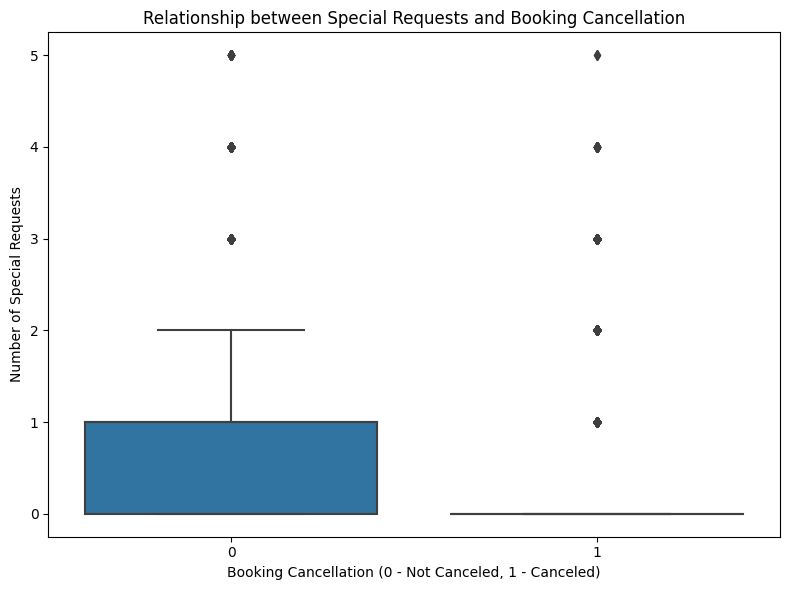

In [55]:

# Create a box plot to visualize the relationship between special requests and booking cancellation
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df)
plt.xlabel('Booking Cancellation (0 - Not Canceled, 1 - Canceled)')
plt.ylabel('Number of Special Requests')
plt.title('Relationship between Special Requests and Booking Cancellation')
plt.tight_layout()
plt.show()

#### Q. Do guests with more special requests tend to leave higher ADR?

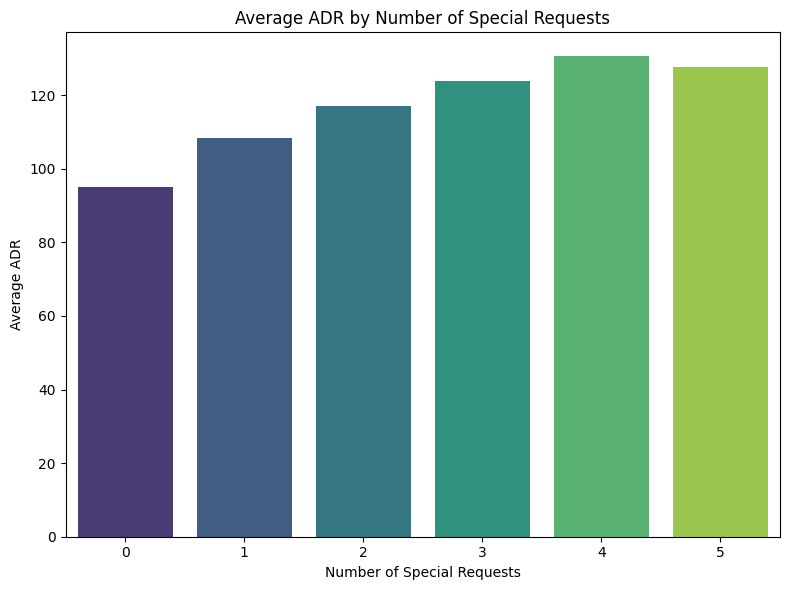

In [57]:

# Calculate the average ADR for each number of special requests
avg_adr_per_request = df.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Create a bar plot to compare the average ADR with the number of special requests
plt.figure(figsize=(8, 6))
sns.barplot(x='total_of_special_requests', y='adr', data=avg_adr_per_request, palette='viridis')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average ADR')
plt.title('Average ADR by Number of Special Requests')
plt.tight_layout()
plt.show()

## Parking Spaces and Customer Preferences:

## Q. What's the demand for car parking spaces, and does it relate to other booking details or customer types?

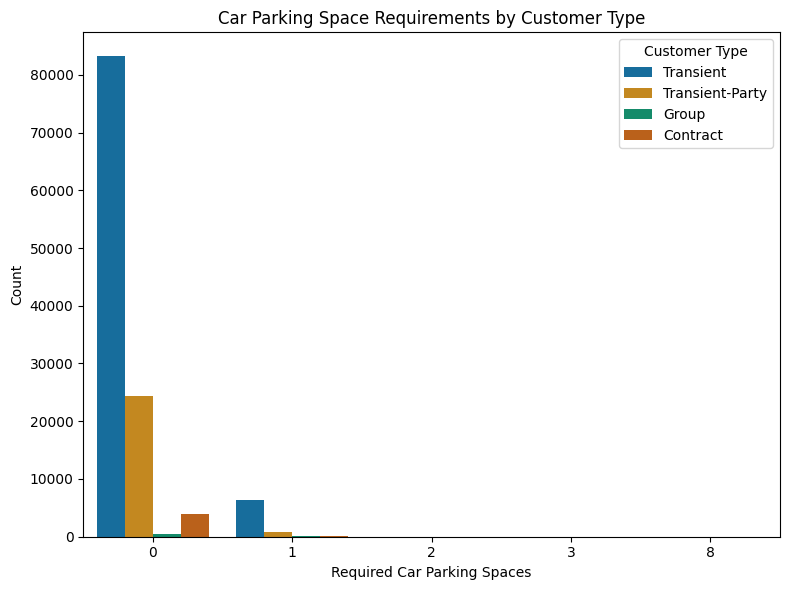

In [59]:

# Create a count plot to visualize car parking space requirements by customer type
plt.figure(figsize=(8, 6))
sns.countplot(x='required_car_parking_spaces', hue='customer_type', data=df, palette='colorblind')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')
plt.title('Car Parking Space Requirements by Customer Type')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()